<h2><a href="https://leetcode.com/problems/largest-color-value-in-a-directed-graph/?envType=study-plan-v2&envId=graph-theory">1857. Largest Color Value in a Directed Graph</a></h2><h3>Hard</h3><hr><p>There is a <strong>directed graph</strong> of <code>n</code> colored nodes and <code>m</code> edges. The nodes are numbered from <code>0</code> to <code>n - 1</code>.</p>

<p>You are given a string <code>colors</code> where <code>colors[i]</code> is a lowercase English letter representing the <strong>color</strong> of the <code>i<sup>th</sup></code> node in this graph (<strong>0-indexed</strong>). You are also given a 2D array <code>edges</code> where <code>edges[j] = [a<sub>j</sub>, b<sub>j</sub>]</code> indicates that there is a <strong>directed edge</strong> from node <code>a<sub>j</sub></code> to node <code>b<sub>j</sub></code>.</p>

<p>A valid <strong>path</strong> in the graph is a sequence of nodes <code>x<sub>1</sub> -&gt; x<sub>2</sub> -&gt; x<sub>3</sub> -&gt; ... -&gt; x<sub>k</sub></code> such that there is a directed edge from <code>x<sub>i</sub></code> to <code>x<sub>i+1</sub></code> for every <code>1 &lt;= i &lt; k</code>. The <strong>color value</strong> of the path is the number of nodes that are colored the <strong>most frequently</strong> occurring color along that path.</p>

<p>Return <em>the <strong>largest color value</strong> of any valid path in the given graph, or </em><code>-1</code><em> if the graph contains a cycle</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2021/04/21/leet1.png" style="width: 400px; height: 182px;" /></p>

<pre>
<strong>Input:</strong> colors = &quot;abaca&quot;, edges = [[0,1],[0,2],[2,3],[3,4]]
<strong>Output:</strong> 3
<strong>Explanation:</strong> The path 0 -&gt; 2 -&gt; 3 -&gt; 4 contains 3 nodes that are colored <code>&quot;a&quot; (red in the above image)</code>.
</pre>

<p><strong class="example">Example 2:</strong></p>

<p><img alt="" src="https://assets.leetcode.com/uploads/2021/04/21/leet2.png" style="width: 85px; height: 85px;" /></p>

<pre>
<strong>Input:</strong> colors = &quot;a&quot;, edges = [[0,0]]
<strong>Output:</strong> -1
<strong>Explanation:</strong> There is a cycle from 0 to 0.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>n == colors.length</code></li>
	<li><code>m == edges.length</code></li>
	<li><code>1 &lt;= n &lt;= 10<sup>5</sup></code></li>
	<li><code>0 &lt;= m &lt;= 10<sup>5</sup></code></li>
	<li><code>colors</code> consists of lowercase English letters.</li>
	<li><code>0 &lt;= a<sub>j</sub>, b<sub>j</sub>&nbsp;&lt; n</code></li>
</ul>

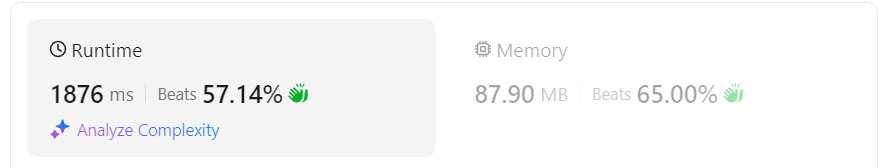

In [8]:
from typing import List
from collections import defaultdict, deque

class Solution:
    def largestPathValue(self, colors: str, edges: List[List[int]]) -> int:
        graph = defaultdict(list)
        indegree = [0] * len(colors)
        for a, b in edges:
            graph[a].append(b)
            indegree[b] += 1

        queue = deque([i for i in range(len(colors)) if indegree[i] == 0])    # add nodes to queue with indegree 0
        dp = [[0] * 26 for _ in range(len(colors))]

        max_color = -1
        while queue:
            node = queue.popleft()
            color_index = ord(colors[node]) - ord('a')   # get the index of the color
            dp[node][color_index] += 1      

            max_color = max(max_color, dp[node][color_index])

            for neighbor in graph[node]:
                indegree[neighbor] -= 1
                
                for c in range(26):
                    dp[neighbor][c] = max(dp[neighbor][c], dp[node][c])   #for all 26 cols , get max out of its color and nodes color
                    # print(f"dp[neighbor][c] : {dp[neighbor][c]}")

                if indegree[neighbor] == 0:
                    queue.append(neighbor)


        if any(indegree):
            return -1

        return max_color

In [9]:
colors = "abaca"
edges = [[0,1],[0,2],[2,3],[3,4]]
sol = Solution()
sol.largestPathValue(colors, edges)

3